In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
#read data
df=pd.read_csv(r'D:\Data_Science\7-Machine_Learning\projects\classfication_logistic&SVM&Desicion_tree\8)Rainfall Prediction\Rainfall.csv')

In [3]:
#show data
df.head(9)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
5,6,1018.8,24.3,20.9,19.2,18.0,84,51,yes,7.7,20.0,14.5
6,7,1021.8,21.4,18.8,17.0,15.0,79,56,no,3.4,30.0,21.5
7,8,1020.8,21.0,18.4,16.5,14.4,78,28,no,7.7,60.0,14.3
8,9,1020.6,18.9,18.1,17.1,14.3,78,79,no,3.3,70.0,39.3


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['rainfall']=encoder.fit_transform(df['rainfall'])

In [5]:
df.head(3)


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2


In [6]:
df['rainfall'].value_counts(normalize=True)

rainfall
1    0.680328
0    0.319672
Name: proportion, dtype: float64

In [7]:
df.columns = df.columns.str.strip() 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    int64  
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 34.4 KB


In [9]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,365.000000,365.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.506849,21.536986
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.723724,10.069712
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.700000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.900000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [10]:
#check null
df.isna().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [11]:
#handel null->drop
df=df.dropna()

In [12]:
#check duplicated
df.duplicated().sum()

np.int64(0)

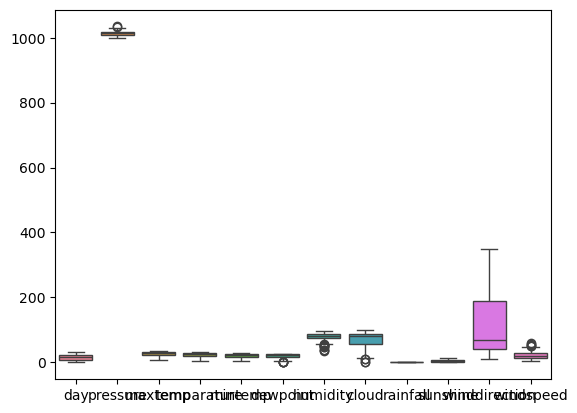

In [13]:
#To show If there outlier
sns.boxplot(df)
plt.show()

In [14]:
df.value_counts().sort_values(ascending=True)

day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  rainfall  sunshine  winddirection  windspeed
3    1010.6    33.3     29.5         27.3     24.5      75        38     0         10.3      20.0           5.5          1
     1011.4    30.8     26.5         22.8     23.9      86        84     1         3.1       220.0          11.8         1
     1011.7    29.7     26.8         24.2     23.7      83        88     1         1.6       60.0           52.8         1
30   1008.8    32.1     29.8         28.0     26.0      80        73     1         9.8       220.0          22.8         1
     1010.3    33.1     30.0         27.8     26.0      80        83     1         6.3       190.0          24.4         1
                                                                                                                        ..
2    1011.6    32.3     28.9         26.8     24.5      78        54     0         11.4      100.0          9.8          1
     1011.0    29.8  

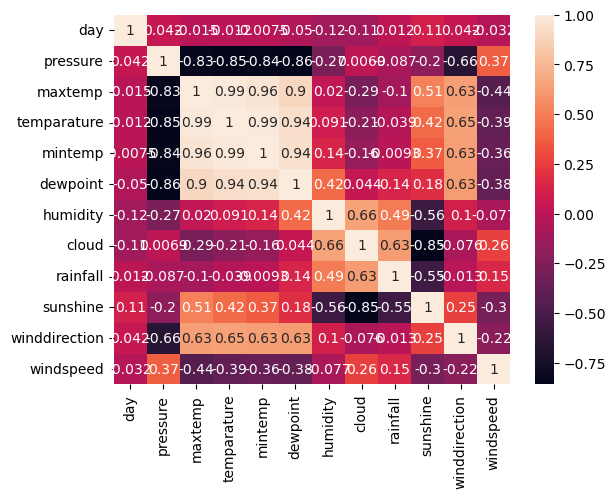

In [15]:
#To show All relationships between variables
sns.heatmap(df.corr(),annot=True)
plt.show()

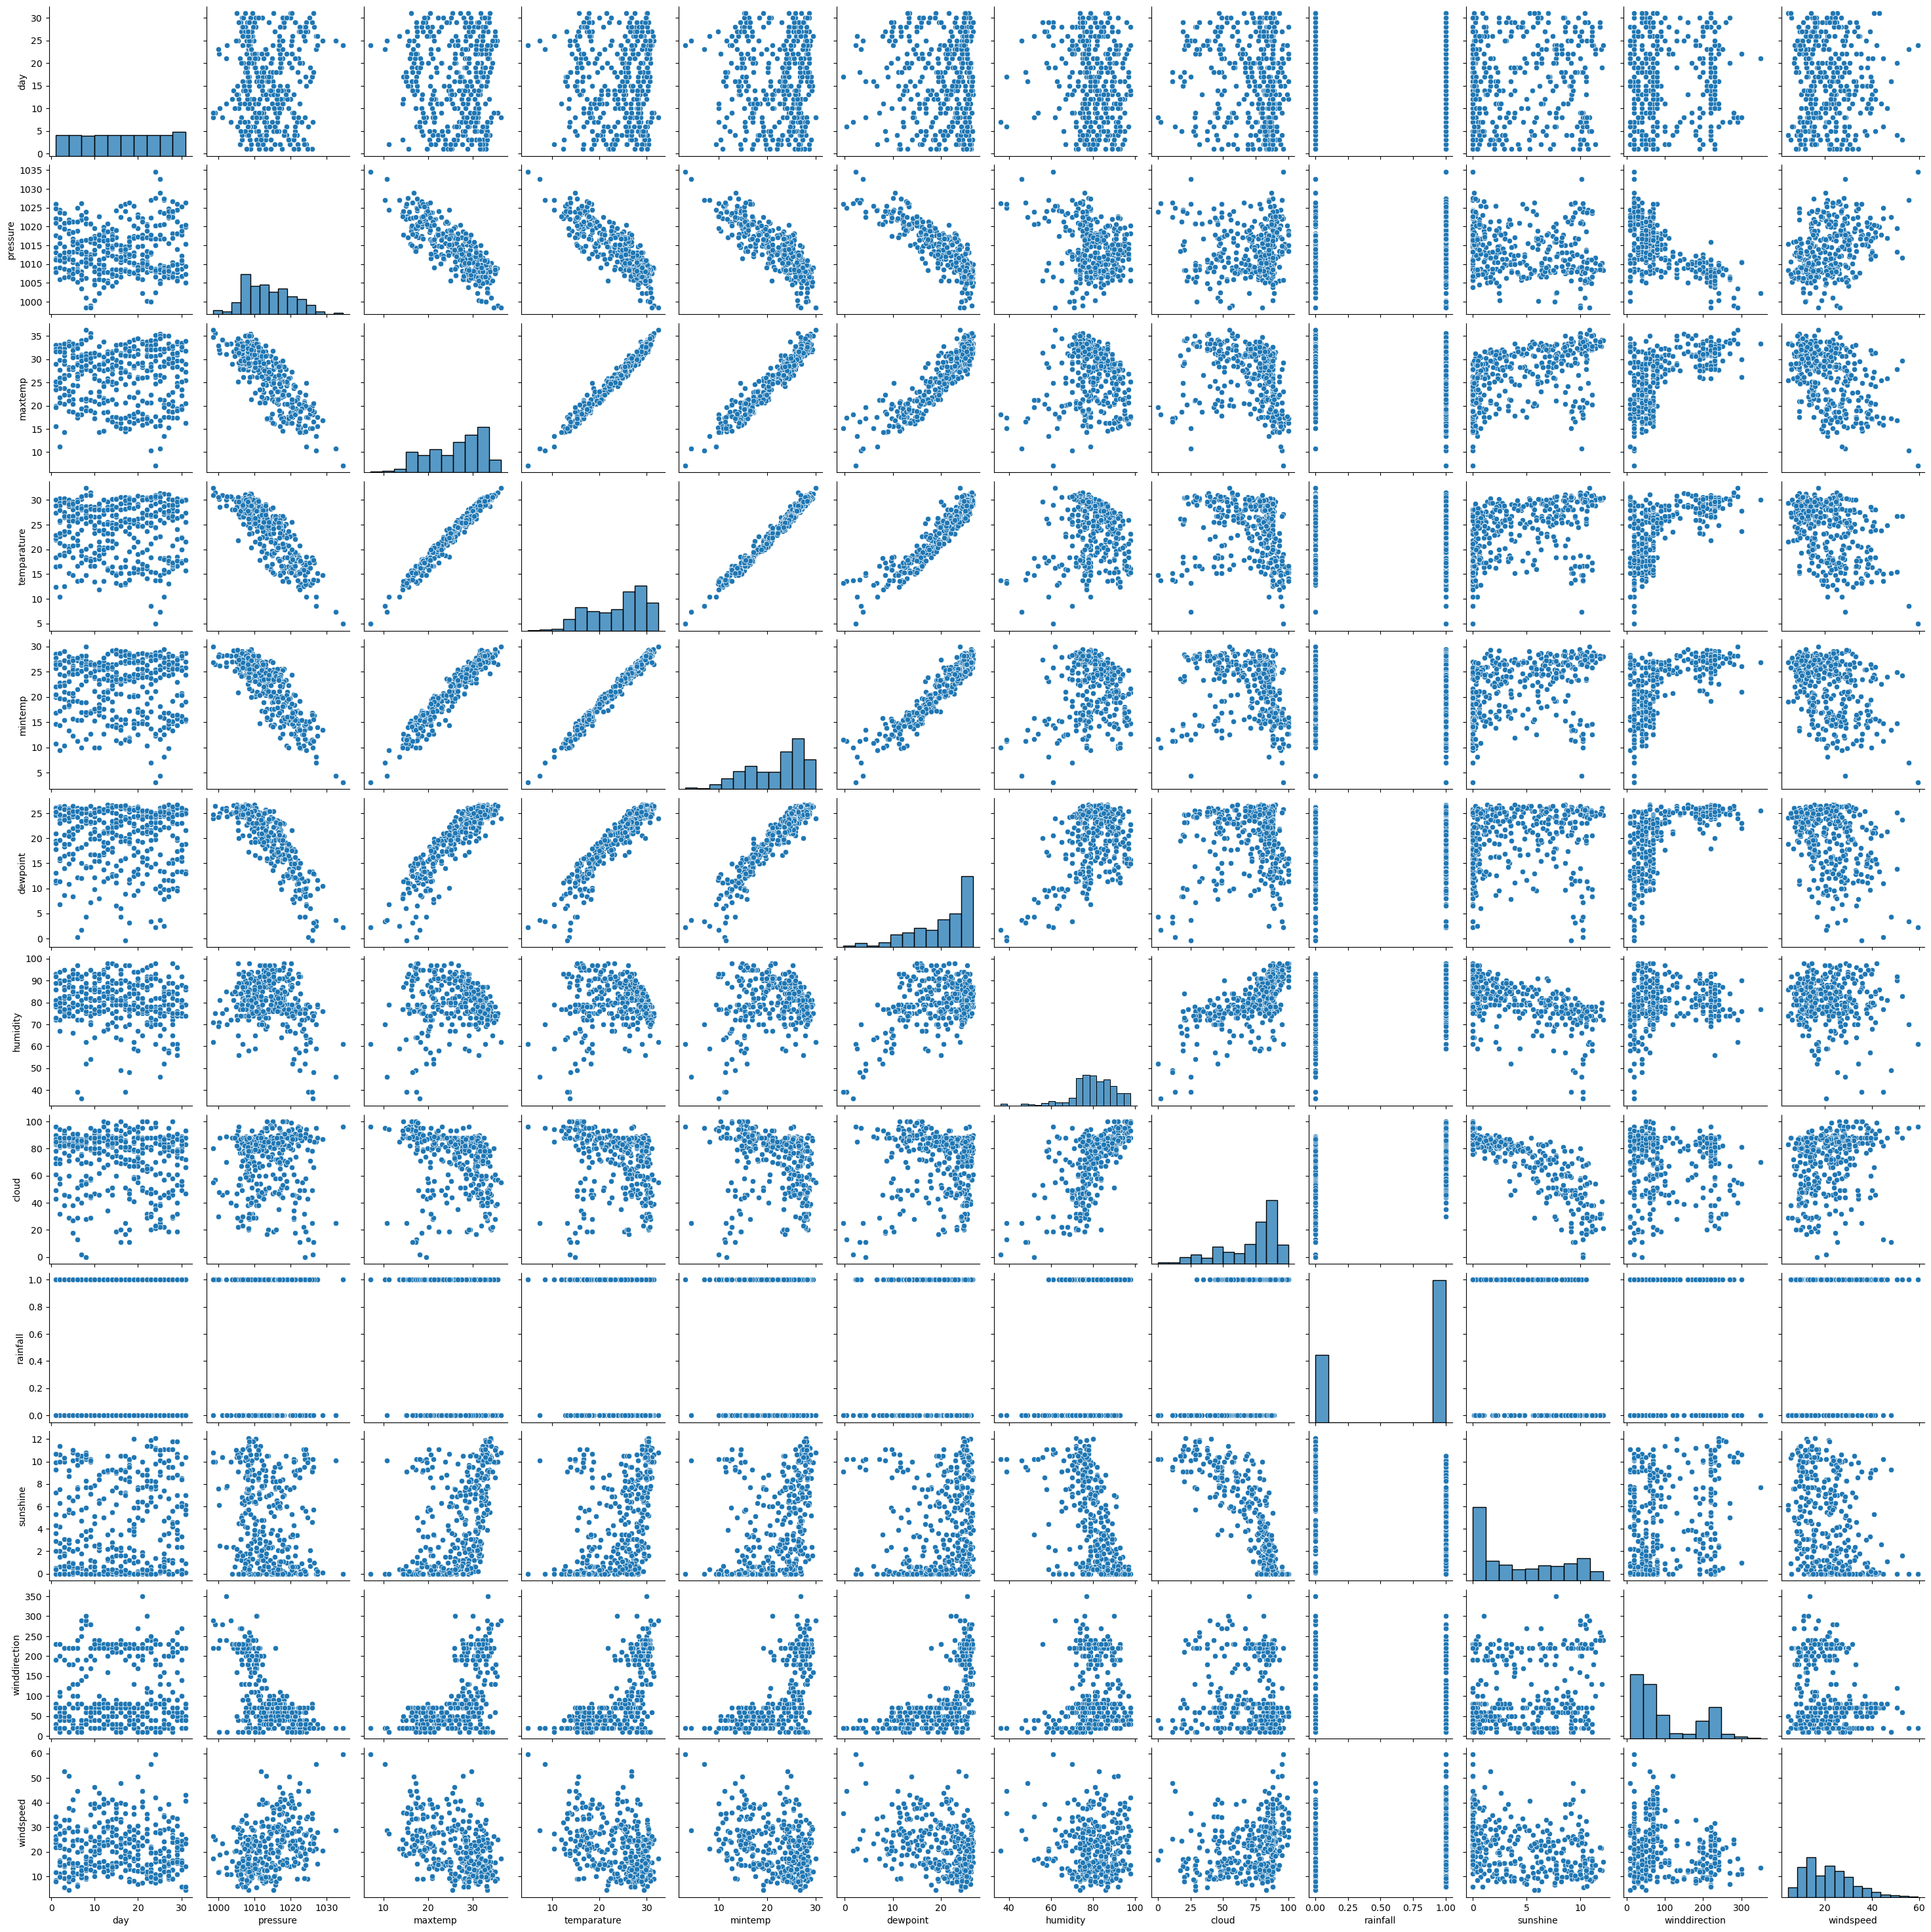

In [14]:
#TO show All data
sns.pairplot(df)
plt.show()

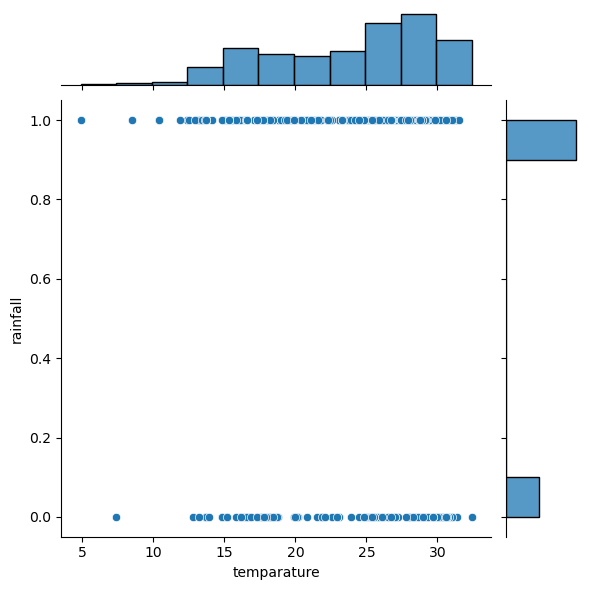

In [16]:
#relationship betwen temparature and rainfall
sns.jointplot(x='temparature',y='rainfall',data=df)
plt.show()

In [15]:
#split data to x and y
x=df.drop(columns='rainfall')
y=df['rainfall']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.1,stratify=y)

In [17]:
#Model use SVM

In [18]:
from sklearn import svm
model=svm.SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [19]:
#Accuracy trainSet ->SVM
pred_traindata=model.predict(x_train)
accuracy_trainingset=accuracy_score(pred_traindata,y_train)
accuracy_trainingset

0.8201219512195121

In [20]:
#Accuracy TestSet ->SVM
pred_testdata=model.predict(x_test)
accuracy_testset=accuracy_score(pred_testdata,y_test)
accuracy_testset

0.8648648648648649

In [21]:
from sklearn.metrics import precision_score,confusion_matrix,recall_score,f1_score,classification_report
perc=precision_score(pred_testdata,y_test,average='binary')
recall=recall_score(pred_testdata,y_test,average='binary')
f1=f1_score(pred_testdata,y_test,average='binary')
confusion=confusion_matrix(pred_testdata,y_test)
report=classification_report(pred_testdata,y_test)

print('perc=',perc)
print('recall=',recall)
print('f1=',f1)
print('confusion=',confusion)
print('report=',report)

df.sample

perc= 0.96
recall= 0.8571428571428571
f1= 0.9056603773584906
confusion= [[ 8  1]
 [ 4 24]]
report=               precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.96      0.86      0.91        28

    accuracy                           0.86        37
   macro avg       0.81      0.87      0.83        37
weighted avg       0.89      0.86      0.87        37



<bound method NDFrame.sample of      day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0      1    1025.9     19.9         18.3     16.8      13.1        72     49   
1      2    1022.0     21.7         18.9     17.2      15.6        81     83   
2      3    1019.7     20.3         19.3     18.0      18.4        95     91   
3      4    1018.9     22.3         20.6     19.1      18.8        90     88   
4      5    1015.9     21.3         20.7     20.2      19.9        95     81   
..   ...       ...      ...          ...      ...       ...       ...    ...   
361   27    1022.7     18.8         17.7     16.9      15.0        84     90   
362   28    1026.6     18.6         17.3     16.3      12.8        75     85   
363   29    1025.9     18.9         17.7     16.4      13.3        75     78   
364   30    1025.3     19.2         17.3     15.2      13.3        78     86   
365   31    1026.4     20.5         17.8     15.5      13.0        74     66   

     ra

In [22]:
#Model use DecisionTree

In [23]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(ccp_alpha=0.1)
model2.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.1)

In [24]:
#Accuracy trainSet ->DecisionTree

pred_traindata=model2.predict(x_train)
accuracy_trainingset=accuracy_score(pred_traindata,y_train)
accuracy_trainingset

0.8140243902439024

In [25]:
#Accuracy TestSet ->DecisionTree
pred_testdata=model2.predict(x_test)
accuracy_testset=accuracy_score(pred_testdata,y_test)
accuracy_testset

0.8918918918918919

In [26]:
#Model use KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=5)
model3.fit(x_train,y_train)


KNeighborsClassifier()

In [28]:
#Accuracy trainSet ->KNN

pred_traindata=model3.predict(x_train)
accuracy_trainingset=accuracy_score(pred_traindata,y_train)
accuracy_trainingset

0.8475609756097561

In [29]:
#Accuracy TestSet ->KNN
pred_testdata=model2.predict(x_test)
accuracy_testset=accuracy_score(pred_testdata,y_test)
accuracy_testset

0.8918918918918919

In [ ]:
#DecisionTree & KNN the same accuracy in testSet

In [30]:
#Check

input=(3	,1019.7	,20.3	,19.3	,18.0	,18.4	,95	,91	,0.0	,40.0	,14.2)
input_arr=np.asarray(input)
input_reshape=input_arr.reshape(1,-1)
prediction=model3.predict(input_reshape)
if(prediction[0]==0):
    print('will not rainfall 🌤️')
else:
    print('will rainfall🌧️')

will rainfall🌧️


c:\Users\Mohamed Hagag\.conda\envs\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [31]:
import joblib
joblib.dump(model3,'rainfallpkl.pkl')

['rainfallpkl.pkl']